In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 19.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=646aa5e5300d268f64704273d5086c69b37ca5e17103c7ab54c63425e1dd4933
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

In [ ]:
start = '2000-01-01'
end = '2021-08-31'

In [ ]:
spy = pdr.get_data_yahoo('SPY', start=start, end=end)
qqq = pdr.get_data_yahoo('QQQ', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,97.506668,8164300
2000-01-04,143.531250,144.062500,139.640625,139.750000,93.693573,8089800
2000-01-05,139.937500,141.531250,137.250000,140.000000,93.861176,12177900
2000-01-06,139.625000,141.500000,137.750000,137.750000,92.352676,6227200
2000-01-07,140.312500,145.750000,140.062500,145.750000,97.716209,8066500
...,...,...,...,...,...,...
2021-08-24,447.970001,448.540009,447.420013,447.970001,447.970001,38744700
2021-08-25,448.170013,449.459991,447.769989,448.910004,448.910004,40529700
2021-08-26,448.609985,448.859985,446.160004,446.260010,446.260010,57829600


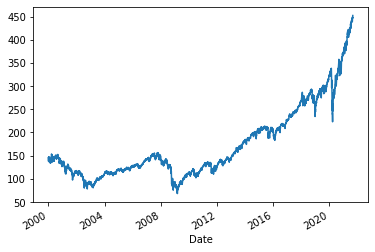

In [ ]:
spy['Close'].plot()

In [ ]:
spy['Daily Return'] = spy.Close.pct_change()

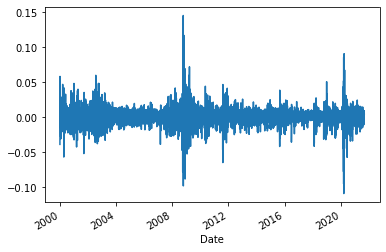

In [ ]:
spy['Daily Return'].plot()

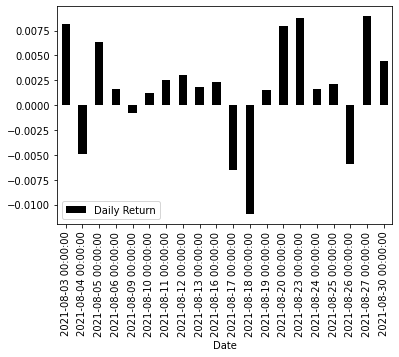

In [ ]:
spy.iloc[-20:].plot.bar(y='Daily Return', color='k')

In [ ]:
qqq['Daily Return'] = qqq.Close.pct_change()

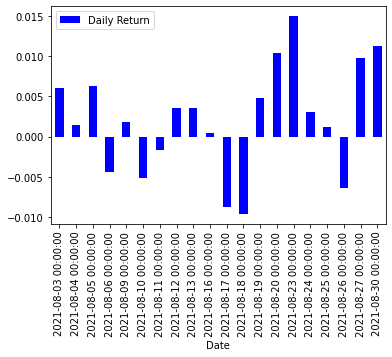

In [ ]:
qqq.iloc[-20:].plot.bar(y='Daily Return', color='b')

In [ ]:
df = spy.join(qqq, rsuffix='_r')

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Open_r,High_r,Low_r,Close_r,Adj Close_r,Volume_r,Daily Return_r
Date,,,,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,97.506668,8164300,NaN,96.187500,96.187500,90.750000,94.750000,82.267441,36345200,NaN
2000-01-04,143.531250,144.062500,139.640625,139.750000,93.693573,8089800,-0.039106,92.000000,93.500000,87.937500,88.250000,76.623764,33786600,-0.068602
2000-01-05,139.937500,141.531250,137.250000,140.000000,93.861176,12177900,0.001789,87.500000,89.625000,84.250000,86.000000,74.670212,42496600,-0.025496
2000-01-06,139.625000,141.500000,137.750000,137.750000,92.352676,6227200,-0.016071,86.875000,88.000000,79.750000,80.093750,69.542053,37134800,-0.068677
2000-01-07,140.312500,145.750000,140.062500,145.750000,97.716209,8066500,0.058076,82.937500,90.000000,82.500000,90.000000,78.143234,28138200,0.123683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,447.970001,448.540009,447.420013,447.970001,447.970001,38744700,0.001587,373.839996,374.989990,373.359985,374.369995,374.369995,21732900,0.003054
2021-08-25,448.170013,449.459991,447.769989,448.910004,448.910004,40529700,0.002098,374.630005,375.390015,373.859985,374.799988,374.799988,20441900,0.001149
2021-08-26,448.609985,448.859985,446.160004,446.260010,446.260010,57829600,-0.005903,373.920013,374.619995,371.970001,372.420013,372.420013,29133300,-0.006350


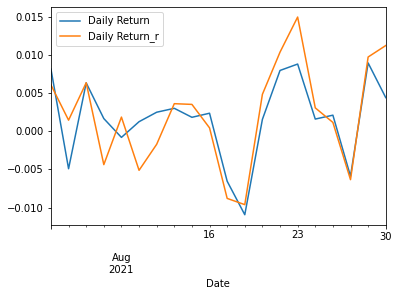

In [ ]:
df.iloc[-20:].plot(y=['Daily Return','Daily Return_r'])

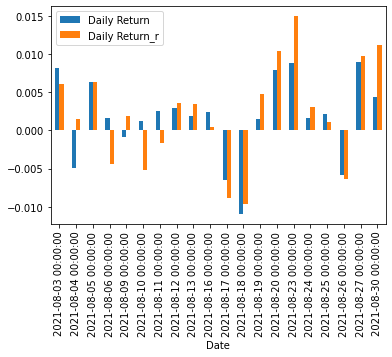

In [ ]:
df.iloc[-20:].plot.bar(y=['Daily Return', 'Daily Return_r'])

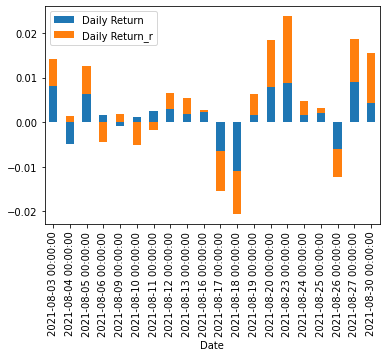

In [ ]:
df.iloc[-20:].plot.bar(y=['Daily Return', 'Daily Return_r'], stacked=True)

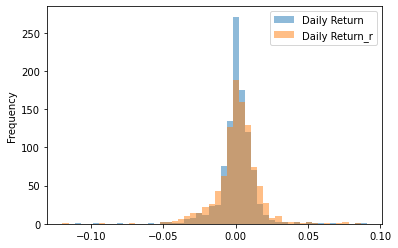

In [ ]:
df.iloc[-1000:].plot.hist(y=['Daily Return', 'Daily Return_r'], bins=50, alpha=0.5)

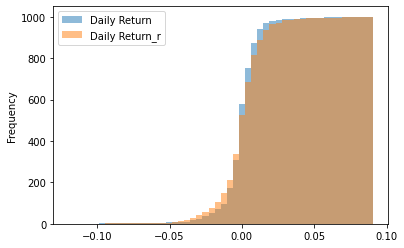

In [ ]:
df.iloc[-1000:].plot.hist(y=['Daily Return', 'Daily Return_r'], bins=50, alpha=0.5, cumulative=True)

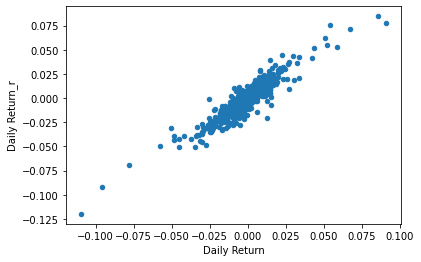

In [ ]:
df.iloc[-1000:].plot.scatter(x='Daily Return', y='Daily Return_r', color='orange')

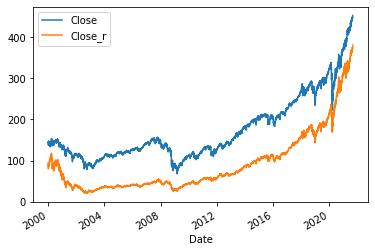

In [ ]:
df.plot(y=['Close','Close_r'])

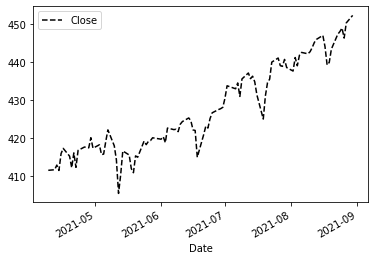

In [ ]:
df.iloc[-100:].plot(y=['Close'], style='k--')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe969d1d4d0>,
      dtype=object)

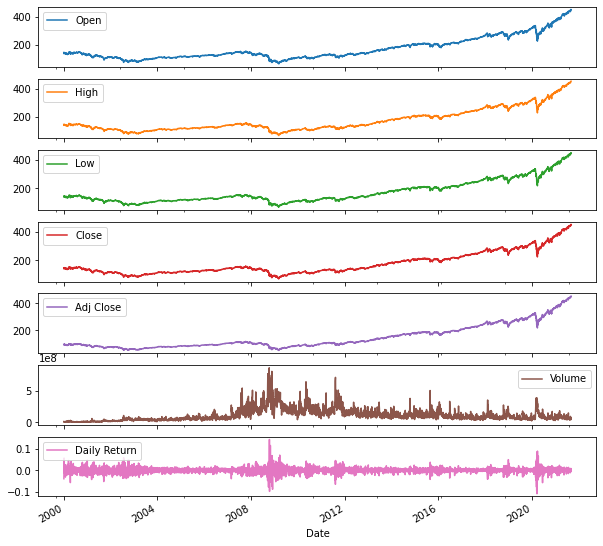

In [ ]:
spy.plot(subplots=True, figsize=(10,10))